In [33]:
# Let`s import all packages that we may need:
import datetime
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn import cross_validation 
# from cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# VARMA models
from statsmodels.tsa.statespace.varmax import VARMAX


## Raw Data Extracted from the sensors of the plant

In [34]:
data = pd.read_excel("long_data.xlsx",header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,PI Tags,3-66502-RS7@ai0543,3-RRF#PLIN@dt0160,3-63611-PT2@ai0604,3-63611-PT500@ai0503,3-63611-PT501@ai0504,3-63611-PT502@ai0505,3-64323-TE4@ai3510,3-64323-TE5@ai3511,3-64323-TE8@ai3514,3-64323-TE9@ai3515,3-63312-TT38A@ai0314,3-63312-TT38B@ai0315,3-63312-TT38C@ai0316,3-63336-TT9A@ai1024,3-63336-TT9B@ai1025,3-63336-TT9C@ai1026
1,PI Tag Descriptions,MW,REACTOR LINEAR POWER,MAIN STM PRESS,BOILER STM DRUM 3311-SD1 PRESS,BOILER STM DRUM 3311-SD1 PRESS,BOILER STM DRUM 3311-SD2 PRESS,BFW PREHTR 1 FW INLET SD1,BFW PREHTR 2 FW INLET SD1,BFW PREHTR 3 FW INLET SD2,BFW PREHTR 4 FW INLET SD2,West header - HT 3312-HD5 NORTH RIZ INLET TEMP...,West header - HT 3312-HD5 MIDDLE RIZ INLET TEM...,West header - HT 3312-HD5 SOUTH RIZ INLET TEMP...,East header - HT 3312-HD6 SOUTH RIZ INLET TEMP...,East header -HT 3312-HD6 MIDDLE RIZ INLET TEMP...,East header -HT 3312-HD6 NORTH RIZ INLET TEMP ...
2,2007-01-01 18:00:00,795.134,92.4604,4282.88,4338.73,4340.08,4299.4,171.114,174.79,173.193,172.349,252.693,252.964,252.582,252.505,252.455,252.286
3,2007-01-02 18:00:00,795.012,92.6023,4280.16,4340.1,4342.93,4280.93,171.765,173.971,173.353,171.943,252.804,253.016,252.649,252.638,252.431,252.267
4,2007-01-03 18:00:00,798.846,92.3527,4283,4344.17,4342.06,4288.5,171.484,174.947,173.3,171.74,252.782,252.838,252.578,252.405,252.476,252.456
5,2007-01-04 18:00:00,792.44,92.5745,4282.93,4337.8,4349.44,4282.9,171.604,174.467,174.054,171.652,252.796,252.959,252.634,252.482,252.355,252.185
6,2007-01-05 18:00:00,793.724,92.6064,4288.08,4343.45,4348.24,4281.03,171.396,174.415,173.503,171.505,252.929,253.056,252.801,252.598,252.432,252.344
7,2007-01-06 18:00:00,791.979,92.3893,4282.29,4335.73,4334.04,4284.12,171.589,174.321,172.816,171.437,252.762,252.966,252.646,252.417,252.344,252.267
8,2007-01-07 18:00:00,794.156,92.2223,4283.92,4342.14,4347.34,4280.91,171.362,174.584,172.783,171.952,252.852,253.056,252.801,252.649,252.522,252.496
9,2007-01-08 18:00:00,796.116,92.2593,4283.28,4339.51,4343.33,4294.81,171.381,174.403,173.201,172.201,252.788,253.03,252.674,252.739,252.352,252.086


## Dropping useless and repeating features to obtain a subset of important features to study

In [35]:
data = data.iloc[2:,:]
data.drop(data.columns[[1,2,5,6,8,9,10,11,12,13]], axis=1, inplace=True)
data.columns= ['Date/Time','SteamLinePressure','BoilerPressure','FeedWaterTemp','RIHT1','RIHT2','RIHT3']

C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Handling Missing Data and dropping rows with NA values

In [36]:
for ii in range(len(data['RIHT1'])):
    if isinstance(data.iloc[ii]['RIHT1'],str):
        data.iloc[ii]['RIHT1'] = np.nan

for ii in range(len(data['RIHT2'])):
    if isinstance(data.iloc[ii]['RIHT2'],str):
        data.iloc[ii]['RIHT2'] = np.nan

for ii in range(len(data['RIHT3'])):
    if isinstance(data.iloc[ii]['RIHT3'],str):
        data.iloc[ii]['RIHT3'] = np.nan

for ii in range(len(data['SteamLinePressure'])):
    if isinstance(data.iloc[ii]['SteamLinePressure'],str):
        data.iloc[ii]['SteamLinePressure'] = np.nan
for ii in range(len(data['FeedWaterTemp'])):
    if isinstance(data.iloc[ii]['FeedWaterTemp'],str):
        data.iloc[ii]['FeedWaterTemp'] = np.nan
for ii in range(len(data['BoilerPressure'])):
    if isinstance(data.iloc[ii]['BoilerPressure'],str):
        data.iloc[ii]['BoilerPressure'] = np.nan
        
        

In [37]:
data['RIHT'] = (data['RIHT1'] + data['RIHT2'] + data['RIHT3'])/3

C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
data=data.set_index('Date/Time')

## Plot for the components of power plant after preprocessing the raw data

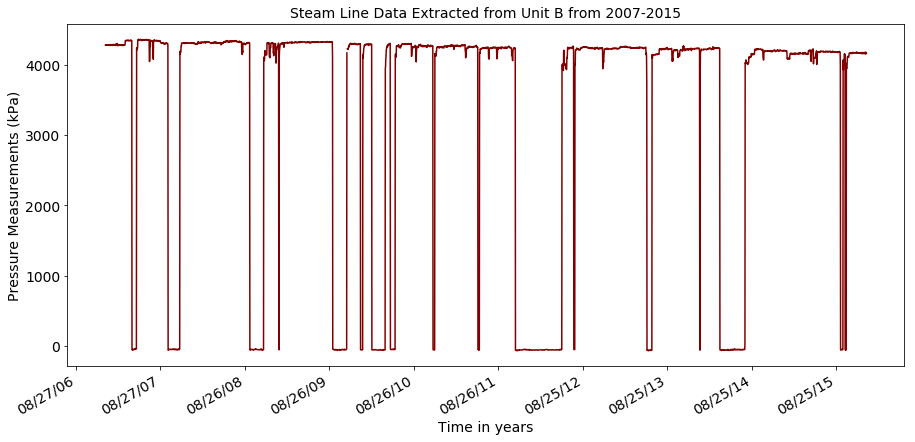

In [39]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['SteamLinePressure'], color = 'maroon', label='Recorded RIHT data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("Steam Line Data Extracted from Unit B from 2007-2015",fontsize=14) 
# ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Pressure Measurements (kPa)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

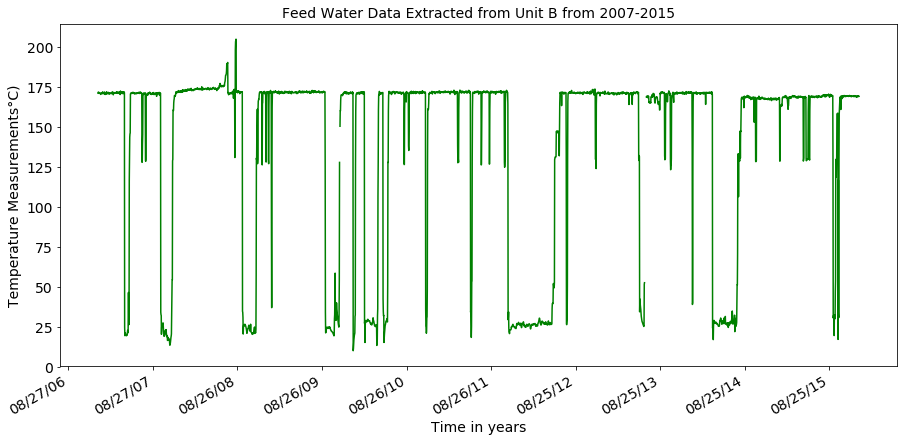

In [40]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['FeedWaterTemp'], color = 'green', label='Recorded RIHT data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("Feed Water Data Extracted from Unit B from 2007-2015",fontsize=14) 
# ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Temperature Measurements"+degree_sign+"C)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

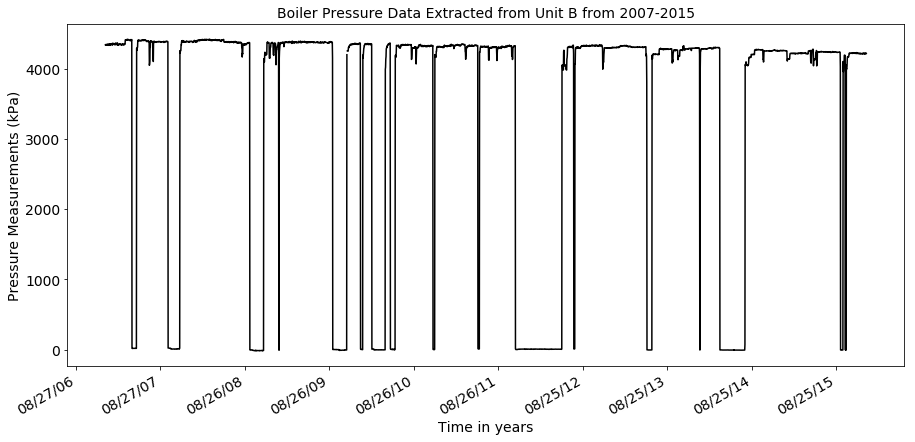

In [41]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['BoilerPressure'], color = 'black', label='Recorded RIHT data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("Boiler Pressure Data Extracted from Unit B from 2007-2015",fontsize=14) 
# ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Pressure Measurements (kPa)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

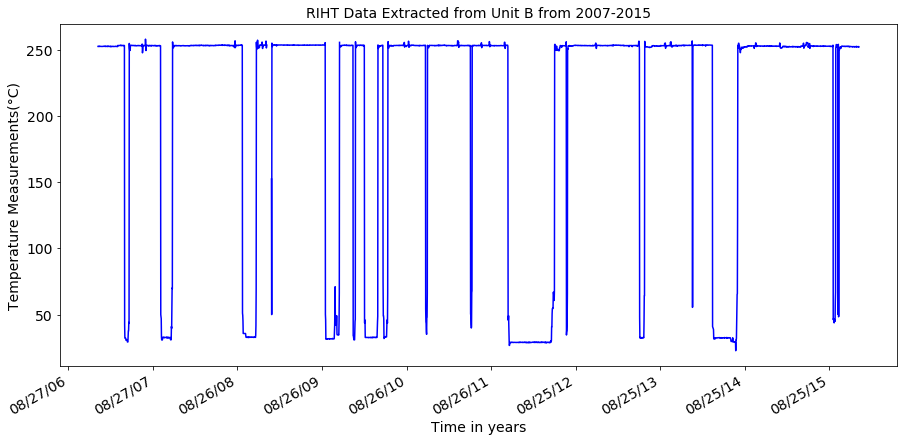

In [42]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['RIHT'], color = 'blue', label='Recorded RIHT data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("RIHT Data Extracted from Unit B from 2007-2015",fontsize=14) 
# ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Temperature Measurements("+degree_sign+"C)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

## Removing the rows corresponding to plant shutdown time

In [43]:

for ii in range(len(data['RIHT1'])):
    if(data.iloc[ii]['RIHT1']<240.0):
        data.iloc[ii]['RIHT1']=np.nan

for ii in range(len(data['RIHT2'])):
    if(data.iloc[ii]['RIHT2']<240.0):
        data.iloc[ii]['RIHT2']=np.nan

for ii in range(len(data['RIHT3'])):
    if(data.iloc[ii]['RIHT3']<240.0):
        data.iloc[ii]['RIHT3']=np.nan

        

In [44]:
data=data.dropna()

In [45]:
data.drop(data.columns[[3,4,5]], axis=1, inplace=True)

In [46]:
data = data.astype(float)

## Plot for components of power plant after removing plant shutdown periods

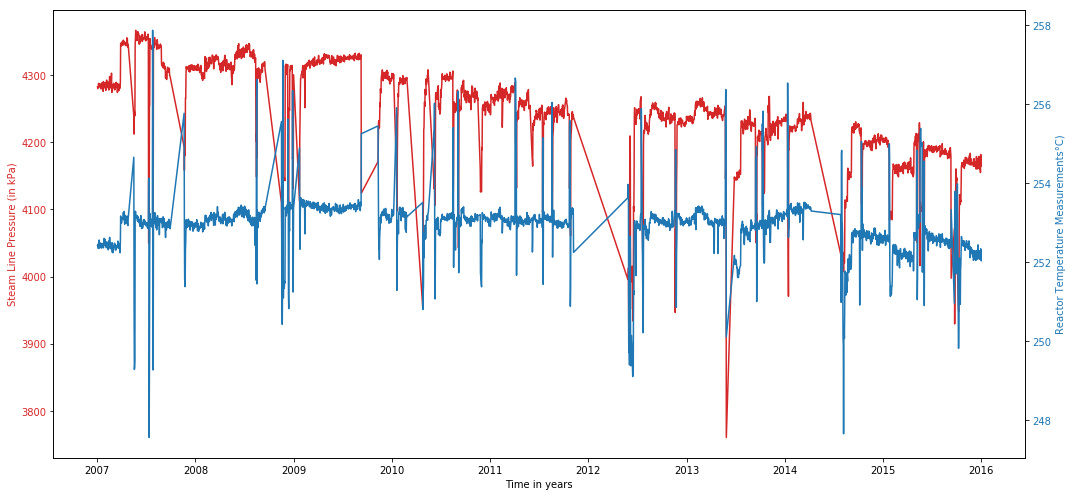

In [47]:
degree_sign= u'\N{DEGREE SIGN}'
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
color = 'tab:red'
ax1.set_xlabel('Time in years')
ax1.set_ylabel('Steam Line Pressure (in kPa)', color=color)
ax1.plot(data.index,data['SteamLinePressure'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Reactor Temperature Measurements'+degree_sign+'C)', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index, data['RIHT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

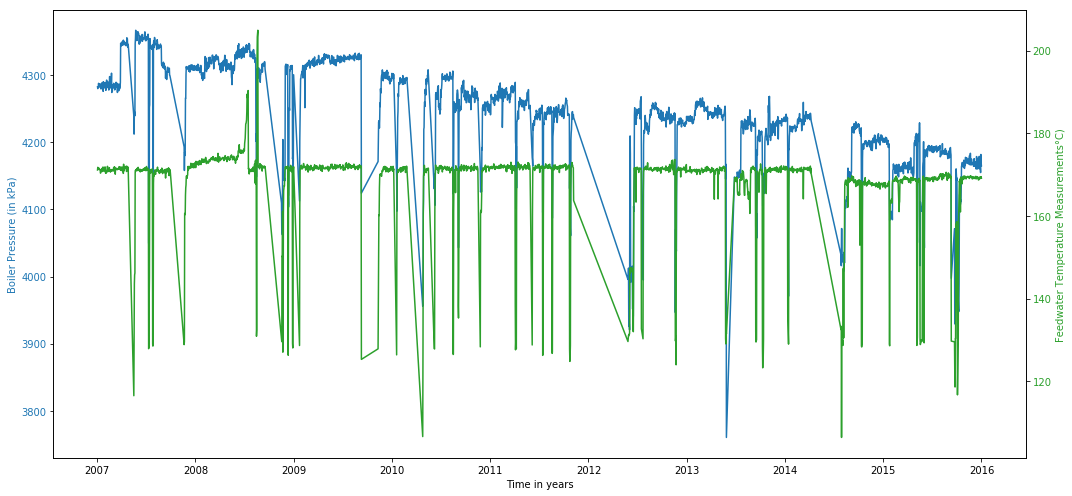

In [48]:
degree_sign= u'\N{DEGREE SIGN}'
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
color = 'tab:blue'
ax1.set_xlabel('Time in years')
ax1.set_ylabel('Boiler Pressure (in kPa)', color=color)
ax1.plot(data.index,data['SteamLinePressure'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Feedwater Temperature Measurements'+degree_sign+'C)', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index, data['FeedWaterTemp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

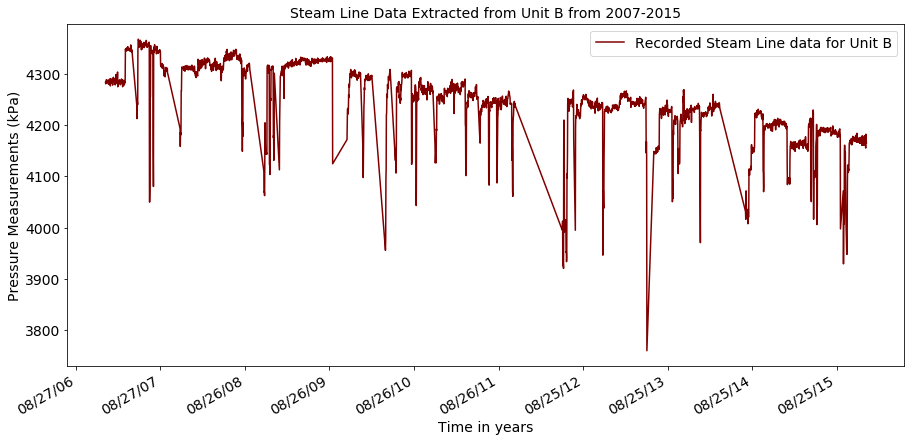

In [49]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['SteamLinePressure'], color = 'maroon', label='Recorded Steam Line data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("Steam Line Data Extracted from Unit B from 2007-2015",fontsize=14) 
ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Pressure Measurements (kPa)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

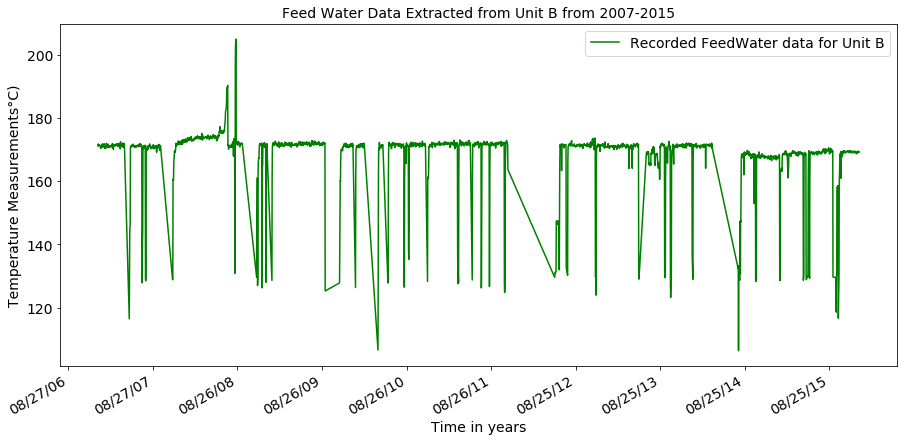

In [50]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['FeedWaterTemp'], color = 'green', label='Recorded FeedWater data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("Feed Water Data Extracted from Unit B from 2007-2015",fontsize=14) 
ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Temperature Measurements"+degree_sign+"C)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

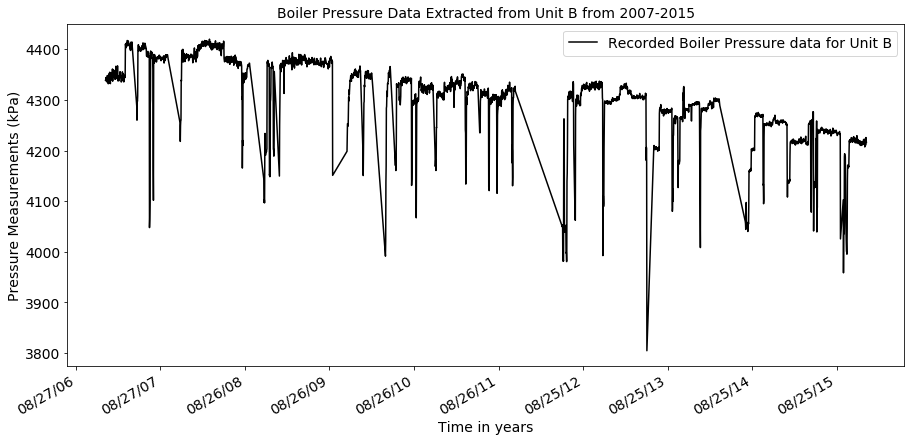

In [51]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['BoilerPressure'], color = 'black', label='Recorded Boiler Pressure data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("Boiler Pressure Data Extracted from Unit B from 2007-2015",fontsize=14) 
ax.legend(fontsize=14,loc="best")
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Pressure Measurements (kPa)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

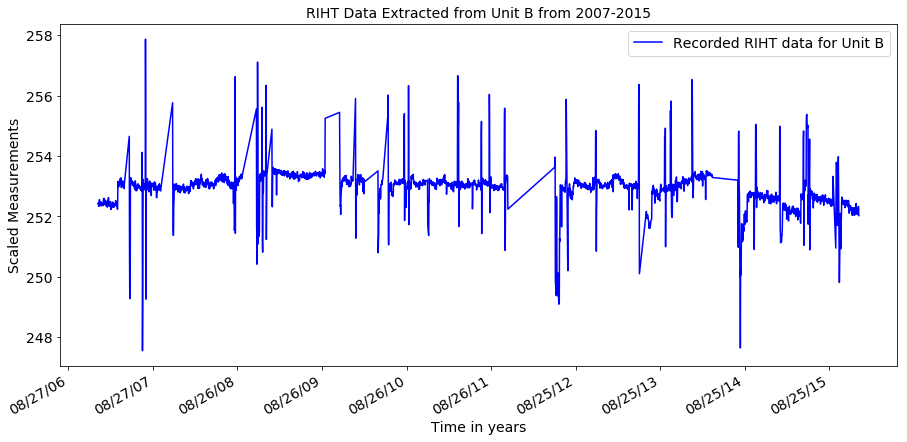

In [52]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index, data['RIHT'], color = 'blue', label='Recorded RIHT data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("RIHT Data Extracted from Unit B from 2007-2015",fontsize=14) 
ax.legend(fontsize=14)
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Temperature Measurements("+degree_sign+"C)",fontsize=14)
ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

In [54]:
data.describe()

,SteamLinePressure,BoilerPressure,FeedWaterTemp,RIHT
count,2605.000000,2605.000000,2605.000000,2605.000000
mean,4245.822095,4303.472874,168.766439,252.920983
std,72.263889,77.228478,9.364738,0.720071
min,3760.205322,3804.785156,106.386101,247.557210
25%,4209.568848,4262.614746,169.396072,252.694209
50%,4248.784668,4315.615234,171.232834,253.027674
75%,4304.269531,4365.190430,171.754913,253.198298
max,4367.143555,4419.879883,204.940033,257.865621


## Tests for stationarity of dataset

In [53]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen


## Johansen Cointergration test for multivariate time series

In [20]:
values = data.values
coint_johansen(values,-1,1).eig

array([1.84239210e-01, 3.02510284e-02, 2.41131810e-02, 2.30883029e-08])

## ADF test for RIHT

In [21]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
# series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
# X = series.values
# X = log(X)
result = adfuller(data['RIHT'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.701750
p-value: 0.000000
	1%: -3.433
	5%: -2.863
	10%: -2.567


## ADF test for Boiler Pressure

In [22]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
# series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
# X = series.values
# X = log(X)
result = adfuller(data["BoilerPressure"].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.993241
p-value: 0.001446
	1%: -3.433
	5%: -2.863
	10%: -2.567


## ADF test for FeedWater Temperature

In [23]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
# series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
# X = series.values
# X = log(X)
result = adfuller(data["FeedWaterTemp"].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.155099
p-value: 0.000000
	1%: -3.433
	5%: -2.863
	10%: -2.567


## ADF test for SteamLine Pressure

In [24]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
# series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
# X = series.values
# X = log(X)
result = adfuller(data["SteamLinePressure"].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.880095
p-value: 0.002186
	1%: -3.433
	5%: -2.863
	10%: -2.567


## Decomposing series in order to check for seasonal components and trend

In [25]:
data.index

DatetimeIndex(['2007-01-01 18:00:00', '2007-01-02 18:00:00',
               '2007-01-03 18:00:00', '2007-01-04 18:00:00',
               '2007-01-05 18:00:00', '2007-01-06 18:00:00',
               '2007-01-07 18:00:00', '2007-01-08 18:00:00',
               '2007-01-09 18:00:00', '2007-01-10 18:00:00',
               ...
               '2015-12-22 18:00:00', '2015-12-23 18:00:00',
               '2015-12-24 18:00:00', '2015-12-25 18:00:00',
               '2015-12-26 18:00:00', '2015-12-27 18:00:00',
               '2015-12-28 18:00:00', '2015-12-29 18:00:00',
               '2015-12-30 18:00:00', '2015-12-31 18:00:00'],
              dtype='datetime64[ns]', name='Date/Time', length=2605, freq=None)

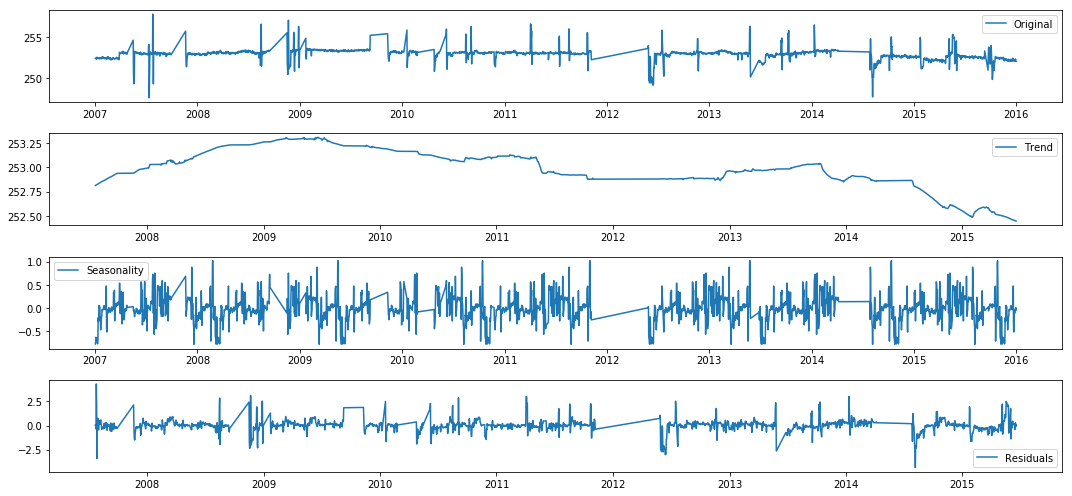

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
# temp=data['RIHT'].values
# temp = np.array(temp, dtype=float)
decomposition = seasonal_decompose(data['RIHT'],freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,7))  
plt.subplot(411)
plt.plot(data['RIHT'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## ACF and PACF for all features

In [27]:
# lag_acf = acf(data['RIHT'], nlags=50)
# plt.figure(figsize=(16, 7))
# #Plot ACF: 
# plt.plot(lag_acf, marker="o")
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(data['RIHT'])),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(data['RIHT'])),linestyle='--',color='gray')
# plt.title('Autocorrelation Function')
# plt.xlabel('number of lags')
# plt.ylabel('correlation')
# plt.tight_layout()

## RIHT

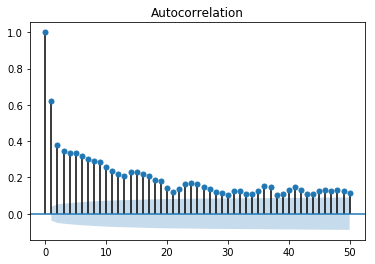

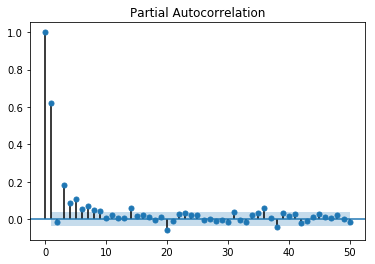

In [28]:
plot_acf(data['RIHT'].values,lags=50)
# plt.figure(figsize=(10,10))  
plt.show()
plot_pacf(data['RIHT'].values,lags=50)
plt.show()

In [32]:
# !pip install pyramid-arima
# from pyramid import arima
from pyramid.arima import auto_arima
model = auto_arima(data['RIHT'], trace=True, error_action='ignore', suppress_warnings=True)
# model.fit(data['RIHT'])
model.aic()

C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4260.966, BIC=4296.155, Fit time=2.298 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4941.801, BIC=4953.531, Fit time=0.290 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4860.979, BIC=4878.573, Fit time=0.219 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4659.130, BIC=4676.724, Fit time=0.471 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4260.832, BIC=4290.156, Fit time=1.292 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4309.081, BIC=4332.540, Fit time=1.216 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=4236.808, BIC=4271.997, Fit time=3.444 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4267.742, BIC=4291.201, Fit time=1.058 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=4236.933, BIC=4283.852, Fit time=4.135 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_o

4236.808419381827

## Boiler Pressure

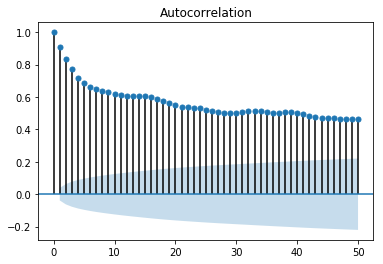

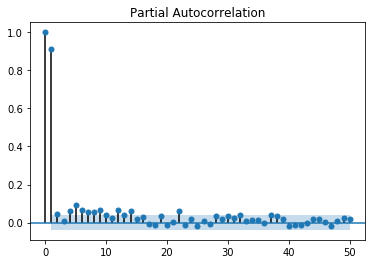

In [33]:
plot_acf(data['BoilerPressure'].values,lags=50)  
plt.show()
plot_pacf(data['BoilerPressure'].values,lags=50)
plt.show()

In [34]:
from pyramid.arima import auto_arima
model = auto_arima(data['BoilerPressure'], trace=True, error_action='ignore', suppress_warnings=True)
# model.fit(data['RIHT'])
model.aic()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25525.029, BIC=25536.758, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25507.461, BIC=25525.055, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=25505.082, BIC=25522.676, Fit time=0.214 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=25304.032, BIC=25327.491, Fit time=1.736 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=25306.798, BIC=25336.122, Fit time=1.408 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.573 seconds


25304.031891260944

## FeedWater Temperature

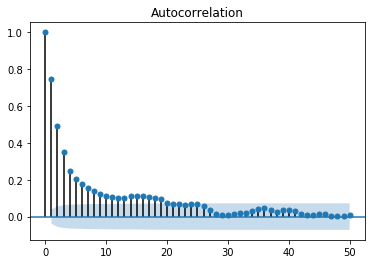

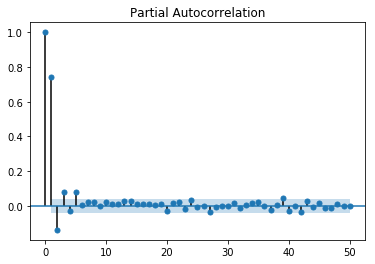

In [35]:
plot_acf(data['FeedWaterTemp'].values,lags=50)  
plt.show()
plot_pacf(data['FeedWaterTemp'].values,lags=50)
plt.show()

In [36]:
from pyramid.arima import auto_arima
model = auto_arima(data['FeedWaterTemp'], trace=True, error_action='ignore', suppress_warnings=True)
# model.fit(data['RIHT'])
model.aic()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=16865.369, BIC=16900.558, Fit time=2.951 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=17300.759, BIC=17312.489, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=17302.596, BIC=17320.190, Fit time=0.237 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=17302.472, BIC=17320.066, Fit time=0.285 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=16876.557, BIC=16905.881, Fit time=2.553 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=16870.120, BIC=16911.173, Fit time=3.477 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=16888.728, BIC=16918.052, Fit time=2.355 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=16876.880, BIC=16917.933, Fit time=3.599 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=16940.687, BIC=16964.147, Fit time=2.235 seconds
Fit ARIMA: order=(3

16865.368755006137

## Steam Line Pressure

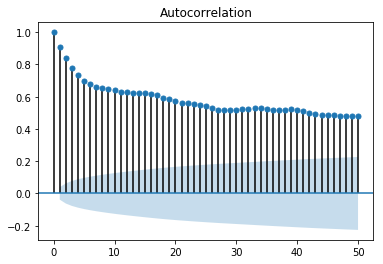

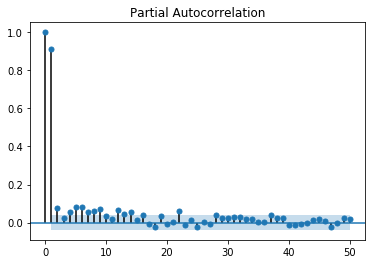

In [37]:
plot_acf(data['SteamLinePressure'].values,lags=50)  
plt.show()
plot_pacf(data['SteamLinePressure'].values,lags=50)
plt.show()

In [38]:
from pyramid.arima import auto_arima
model = auto_arima(data['SteamLinePressure'], trace=True, error_action='ignore', suppress_warnings=True)
# model.fit(data['RIHT'])
print(model.aic())

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25221.769, BIC=25233.498, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25188.611, BIC=25206.206, Fit time=0.151 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=25183.084, BIC=25200.678, Fit time=0.240 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=24986.527, BIC=25009.986, Fit time=1.200 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.681 seconds
24986.526717531335


### Auto-Arima when ran on all features individually suggest ARIMA order of (2,1,2) as the optimal fit for the data as it has min AIC and BIC values

#### Prior to applying VARMA models of order (2,1,2) on the data, we test fit of ARIMA (2,1,2) on the RIHT data

In [39]:
from statsmodels.tsa.arima_model import ARIMA
# 1,1,1 ARIMA Model
model = ARIMA(data.RIHT, order=(2,1,2))
model_fit = model.fit(disp=0)

C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.RIHT   No. Observations:                 2604
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2124.483
Method:                       css-mle   S.D. of innovations              0.547
Date:                Sun, 01 Dec 2019   AIC                           4260.966
Time:                        20:39:09   BIC                           4296.155
Sample:                             1   HQIC                          4273.715
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0001      0.001     -0.073      0.942      -0.003       0.003
ar.L1.D.RIHT     0.0224      0.109      0.205      0.838      -0.192       0.237
ar.L2.D.RIHT     0.0949      0.069      1.370      0.171      -0.041       0.231
ma.L1.D.RIHT    -0.4192      0.106     -3.948      0.000      -0.627      -0.211
ma.L2.D.RIHT    -0.4630      0.106     -4.376      0.000      -0.670      -0.256
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1309           +0.0000j            3.1309            0.0000
AR.2           -3.3671           +0.0000j            3.3671            0.5000
MA.1            1.0851           +0.0000j            1.0851            0.0000
MA.2           -1.9906           +0.0000j            1.9906            0.5000
-----------------------------------------------------------------------------
"""

#### Fit of ARIMA model - plot actual vs forecasted results

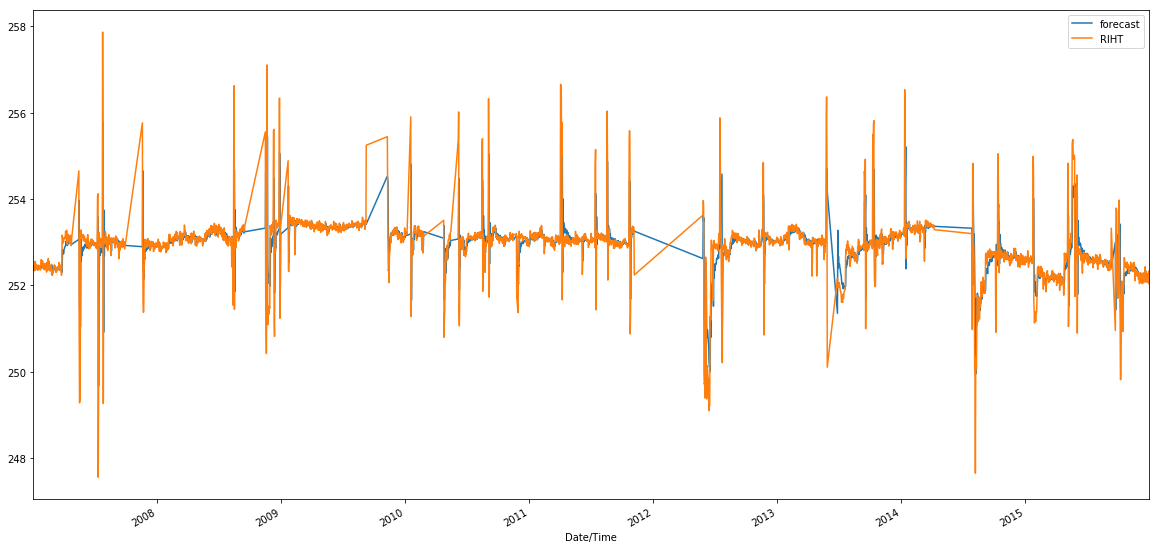

In [41]:
fig,ax=plt.subplots(figsize=(20,10))
model_fit.plot_predict(dynamic=False,ax=ax,alpha=0.05)
plt.show()

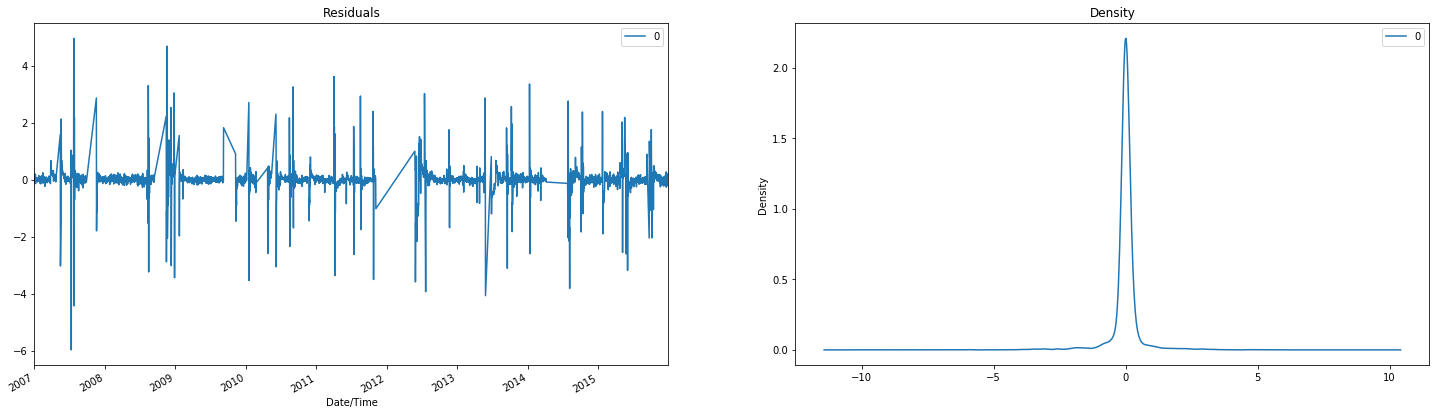

In [42]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
## kde=kernel density estimation 
residuals.plot(kind='kde', title='Density', ax=ax[1],figsize=(25,7)) 
plt.show()

In [43]:
residuals.mean()

0    0.000019
dtype: float64

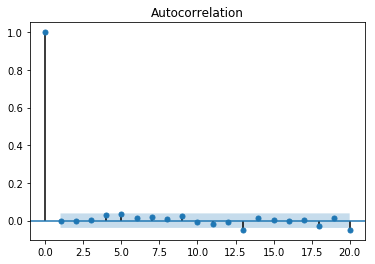

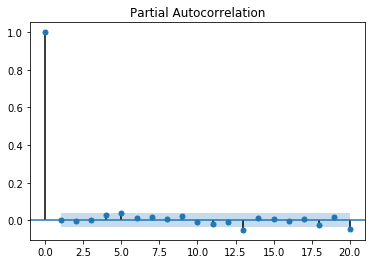

In [46]:
# fig,ax=plt.subplots(2,1,figsize=(15,7))
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=20)
sm.graphics.tsa.plot_pacf(residuals.dropna(),lags=20)
# fig,ax=plt.subplots(2,1,figsize=(15,7))
plt.show()


In [47]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[10])

(array([8.87491462]), array([0.54401445]))

The residuals obtained are not correlated as suggested by the ACF and PACF plots of residuals and also the Box test. p value of 0.54 is greater than the threshold value 0.05 and therefore we cannot reject the null hypothesis stating residuals are independent.

##### Therefore, (2,1,2) is an appropriate order for fit in VARMA models.

## VARMA model - training for data from Jan 2007 - Nov 2015 and predicting RIHT for Dec 2015

In [48]:
from statsmodels.tsa.statespace.varmax import VARMAX
X = data.values
train, test = X[:2575], X[2575:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = VARMAX(history, order=(2,1,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot


C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: 

C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\states

Test MSE: 56.020


C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [49]:
test

array([[4164.44824219, 4215.90869141,  169.20571899,  252.03994242],
       [4166.77001953, 4212.18603516,  169.33273315,  252.09336853],
       [4175.74414062, 4219.04052734,  169.42767334,  252.29153951],
       [4164.58886719, 4210.08447266,  169.36637878,  252.07057699],
       [4165.95507812, 4216.15722656,  169.17138672,  252.19959513],
       [4169.97509766, 4217.41601562,  169.199646  ,  252.17415873],
       [4171.12695312, 4216.57910156,  169.00219727,  252.27392578],
       [4168.44921875, 4215.44335938,  169.30387878,  252.18822225],
       [4164.22851562, 4210.07666016,  169.59274292,  252.0390981 ],
       [4160.50146484, 4210.3984375 ,  169.53529358,  252.09146118],
       [4160.32666016, 4212.62548828,  169.26589966,  252.10371908],
       [4178.91796875, 4218.01953125,  168.98664856,  252.29056295],
       [4168.6328125 , 4213.21435547,  169.35621643,  252.05723063],
       [4167.65136719, 4216.08789062,  169.08865356,  252.11760966],
       [4160.73730469, 4211.873046

In [50]:
predictions

[array([4176.80851642, 4226.04799983,  168.24512642,  252.38899088]),
 array([4175.13975833, 4225.3817833 ,  168.3663563 ,  252.32580855]),
 array([4174.72497057, 4222.52228858,  168.10258501,  252.36457951]),
 array([4179.67999487, 4224.2604593 ,  168.07074944,  252.47439655]),
 array([4176.11357257, 4221.51171627,  168.58216132,  252.34572779]),
 array([4173.76987632, 4222.19890263,  167.95297663,  252.41613738]),
 array([4176.67668476, 4225.31453498,  168.31911741,  252.41061873]),
 array([4177.34940792, 4223.86519664,  167.86165861,  252.46332823]),
 array([4177.16052045, 4224.16434873,  168.4579921 ,  252.41054278]),
 array([4174.53672363, 4221.32379809,  168.66685212,  252.32950156]),
 array([4170.6482701 , 4219.13060557,  168.24597111,  252.35065882]),
 array([4169.3547623 , 4220.55942279,  168.23297804,  252.35897697]),
 array([4178.96966885, 4223.29520184,  167.8356262 ,  252.48162608]),
 array([4179.97911926, 4223.72844952,  168.677563  ,  252.32842022]),
 array([4176.3780232

In [51]:
ts=pd.DataFrame(test)

In [52]:
pred=pd.DataFrame(predictions)

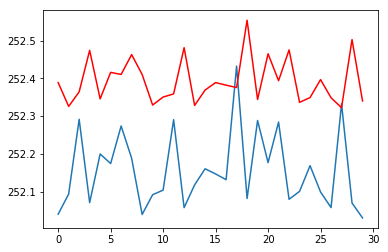

In [53]:
plt.plot(ts[3].values)
plt.plot(pred[3].values, color='red')
plt.show()

In [54]:
t_df = pd.DataFrame(test)
t_df.index = pd.to_datetime(t_df.index,unit='d',origin=pd.Timestamp('2015-12-02 18:00:00'))

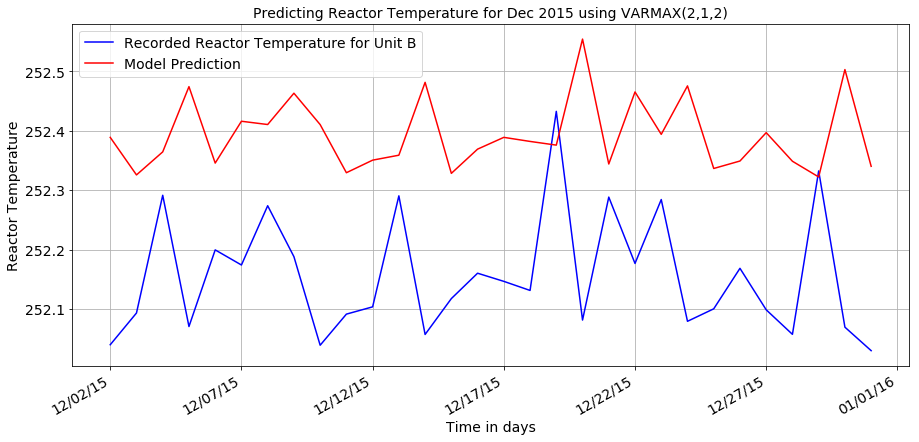

In [55]:
# -*- coding: utf-8 -*-
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(t_df.index, ts[3].values, color = 'blue', label='Recorded Reactor Temperature for Unit B')
hours = mdates.DayLocator(interval = 5)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
ax.plot(t_df.index,pred[3].values , color='red', label='Model Prediction')
# plt.rc('grid', linestyle="-", color='black')
# plt.yticks(np.arange(0, 1.1, 0.5))
# plt.grid(True)
ax.set_title("Predicting Reactor Temperature for Dec 2015 using VARMAX(2,1,2)",fontsize=14) 
ax.legend(fontsize=14)

ax.set_ylabel("Scaled Measurements")
ax.tick_params(axis='both', which='major', labelsize=14)

ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.legend(loc='best',fontsize=14)
ax.set_xlabel("Time in days",fontsize=14)
ax.set_ylabel("Reactor Temperature",fontsize=14)
fig.autofmt_xdate()
plt.grid()
plt.show()

In [56]:
actual=ts[3].values
forecasted = pred[3].values

In [57]:
positive_error=[]
rmse = np.sqrt(mean_squared_error(actual, forecasted))
print('Test RMSE: %.3f' % rmse)
for xx in range(len(actual)):
    error = abs(actual[xx]-forecasted[xx])
    positive_error.append(error)
max_err= max(positive_error)
min_err =min(positive_error)

Test RMSE: 0.271


In [58]:
max_err

0.47293674433370825

In [59]:
min_err

0.010165641826489491

## Long term prediction - VARMAX (2,1,2) implementation to predict RIHT from Jan 2015-Dec 2015

In [127]:
from statsmodels.tsa.statespace.varmax import VARMAX
X = data.values
train, test = X[:2240], X[2240:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = VARMAX(history, order=(2,1,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packag

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anac

C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Kunal Taneja\Anac

Test MSE: 438.991


In [130]:
t_df = pd.DataFrame(test)
t_df.index = pd.to_datetime(t_df.index,unit='d',origin=pd.Timestamp('2014-12-18 18:00:00'))

In [131]:
ts1=pd.DataFrame(test)
pred1 = pd.DataFrame(predictions)

In [132]:
data.iloc[2240]

SteamLinePressure    4199.932617
BoilerPressure       4252.856934
FeedWaterTemp         167.964661
RIHT                  252.736104
Name: 2014-12-18 18:00:00, dtype: float64

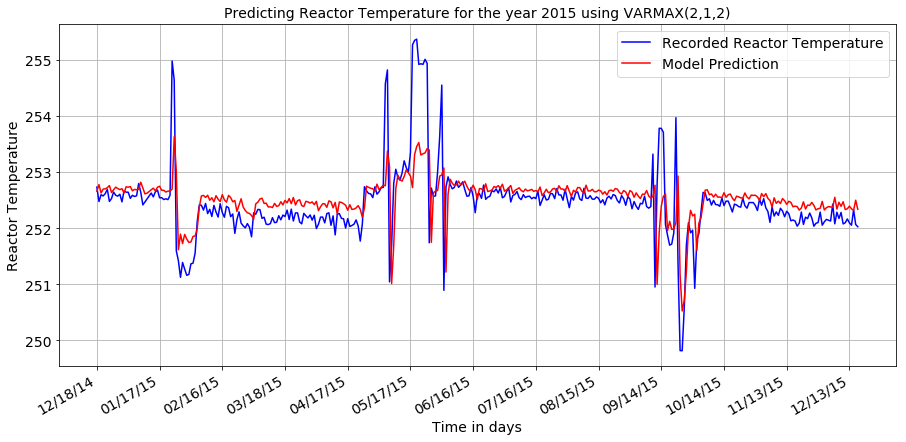

In [136]:
# -*- coding: utf-8 -*-
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(t_df.index, ts1[3].values, color = 'blue', label='Recorded Reactor Temperature')
hours = mdates.DayLocator(interval = 30)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
ax.plot(t_df.index,pred1[3].values , color='red', label='Model Prediction')
# plt.rc('grid', linestyle="-", color='black')
# plt.yticks(np.arange(0, 1.1, 0.5))
# plt.grid(True)
ax.set_title("Predicting Reactor Temperature for the year 2015 using VARMAX(2,1,2)",fontsize=14) 
ax.legend(fontsize=14)

ax.set_ylabel("Scaled Measurements")
ax.tick_params(axis='both', which='major', labelsize=14)

ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.legend(loc='best',fontsize=14)
ax.set_xlabel("Time in days",fontsize=14)
ax.set_ylabel("Reactor Temperature",fontsize=14)
fig.autofmt_xdate()
plt.grid()
plt.show()

In [146]:
predictions


[array([4212.90557412, 4263.42843224,  167.46948524,  252.66298113]),
 array([4207.68787142, 4259.90300169,  167.27174502,  252.78178597]),
 array([4203.97299797, 4257.8176254 ,  167.23209662,  252.63205696]),
 array([4208.39088711, 4262.83419623,  167.44393843,  252.70211109]),
 array([4210.26850903, 4261.53678743,  167.54041584,  252.70570258]),
 array([4214.94218651, 4263.04170747,  167.57829242,  252.72597878]),
 array([4214.68670032, 4263.07642306,  167.37160204,  252.76420868]),
 array([4213.35007771, 4266.46802817,  168.04723824,  252.63986003]),
 array([4214.97140176, 4265.76494515,  167.37362496,  252.68853376]),
 array([4215.73350629, 4265.63335689,  167.53885958,  252.73625473]),
 array([4212.55153557, 4263.49192174,  167.75090554,  252.71014323]),
 array([4211.76529329, 4265.54156899,  167.45689845,  252.69164317]),
 array([4208.12617128, 4263.29043476,  166.9439413 ,  252.70834623]),
 array([4209.55096685, 4265.23898264,  167.7758757 ,  252.63066853]),
 array([4207.6668103

In [165]:
actual=ts1[3].values
forecasted = pred1[3].values

In [169]:
positive_error=[]
rmse = np.sqrt(mean_squared_error(actual, forecasted))
print('Test RMSE: %.3f' % rmse)
for xx in range(len(actual)):
    error = abs(actual[xx]-forecasted[xx])
    positive_error.append(error)
max_err= max(positive_error)
min_err =min(positive_error)

Test RMSE: 0.527


In [170]:
max_err

2.549095405506222

In [171]:
min_err

0.0003347152722028568